# Objectif

Modélisation et simulation de 


<img src="./pendule_solide.svg"/>

Au lieu d'avoir un point massif au bout d'une tige rigide sans masse on va mettre des masses intermédiaires.
On suppose les points équiréparties, la masse totale vaut  $M$ et la longueur $l$.

Le lagrangien libre est donné par
$$
L = \sum_{i=1}^3 m_i \frac{\dot{x}_i^2+\dot{y}_i^2}{2} - g\sum_{i=1}^3 m_i y_i
$$

Mais on a les contraintes

$$
\begin{equation}
\begin{cases}
m_i = \frac{M}{3} \\
x_i = \frac{i}{3}l\sin{\theta}\\
y_i = -\frac{i}{3}l\cos{\theta}
\end{cases}
\end{equation}
$$

Le lagrangien contraint est donc donné par

$$
\begin{align*}
L&=\sum_{i=1}^3 \frac{M}{3}\dot{\theta}^2 l^2\left(\frac{i}{3}\right)^2+g \sum_{i=1}^3\frac{M}{3}\frac{i}{3}l\cos{\theta} \\
&=\frac{M}{3}\dot{\theta}^2 l^2 \sum_{i=1}^3\left(\frac{i}{3}\right)^2+gl\cos{\theta} \frac{M}{3} \sum_{i=1}^3 \frac{i}{3}\\
&=\frac{14M}{27}\dot{\theta}^2 l^2+ g\frac{2M}{3} l\cos{\theta}
\end{align*}
$$

On en déduit via Euler-Lagrange l'équation différentielle sur $\theta$

$$
\frac{\mathrm{d}}{\mathrm{d}t}\frac{\partial L}{\partial \dot{\theta}} - \frac{\partial L}{\partial \theta}=0.$$

c'est à dire

$$
\ddot{\theta} + \frac{9g}{14l} \sin{\theta} = 0
$$

On ramène cette équation différentielle à un système d'ordre 1 

$$
\begin{cases}
\dot{\theta} = \eta,\\
\dot{\eta} = -\frac{9g}{14l} \sin{\theta}
\end{cases}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from scipy.integrate import solve_ivp

In [3]:
g = 9.8
l = 1.

def f(t,X):
    theta, eta = X
    return np.array([eta, -9. * g / (14 * l) * np.sin(theta)])

In [4]:
resultat = solve_ivp(
    fun=f,
    t_span=(0, 10.),
    y0=np.array([np.pi / 2, 0]),

)

In [5]:
type(resultat)

scipy.integrate._ivp.ivp.OdeResult

In [6]:
dir(resultat)

['message',
 'nfev',
 'njev',
 'nlu',
 'sol',
 'status',
 'success',
 't',
 't_events',
 'y',
 'y_events']

In [7]:
resultat.y

array([[ 1.57079633e+00,  1.57079625e+00,  1.57078674e+00,
         1.56981971e+00,  1.47299025e+00, -2.19728326e-01,
        -1.29336308e+00, -1.54811143e+00, -1.74367173e-01,
         9.93276071e-01,  1.55370617e+00,  8.19229010e-01,
        -4.67313102e-01, -1.40899635e+00, -1.45669692e+00,
         7.47329593e-02,  1.18619921e+00,  1.56606277e+00,
         5.12461203e-01, -7.14064068e-01, -1.46872687e+00,
        -1.31349258e+00,  5.72624880e-01,  1.51649248e+00,
         1.26481923e+00, -4.44752476e-01, -1.23004171e+00],
       [ 0.00000000e+00, -9.99363785e-04, -1.09930016e-02,
        -1.10929370e-01, -1.10923127e+00, -3.51203229e+00,
        -1.85328560e+00,  5.18900207e-01,  3.52705325e+00,
         2.62339625e+00,  4.63629457e-01, -2.93594814e+00,
        -3.35642600e+00, -1.41693302e+00,  1.18841356e+00,
         3.54465870e+00,  2.16395929e+00, -1.19347345e-01,
        -3.31123143e+00, -3.08151714e+00, -1.11594460e+00,
         1.77994146e+00,  3.25911056e+00,  7.99571483e-

In [8]:
resultat.t

array([0.00000000e+00, 1.58629172e-04, 1.74492089e-03, 1.76078381e-02,
       1.76237010e-01, 8.01136660e-01, 1.17993244e+00, 1.55872822e+00,
       2.16594291e+00, 2.52275980e+00, 2.87957669e+00, 3.44650411e+00,
       3.82571609e+00, 4.20344091e+00, 4.61783612e+00, 5.18849444e+00,
       5.55603185e+00, 5.92356925e+00, 6.49497268e+00, 6.85339867e+00,
       7.20296863e+00, 7.66473335e+00, 8.28388189e+00, 8.72588841e+00,
       9.16322683e+00, 9.71798643e+00, 1.00000000e+01])

In [9]:
theta, eta = resultat.y

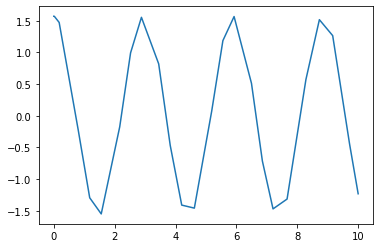

In [10]:
plt.plot(resultat.t, theta)

In [11]:
resultat = solve_ivp(
    fun=f,
    t_span=(0, 10.),
    y0=np.array([np.pi / 2, 0]),
    dense_output=True
)

In [12]:
dir(resultat)

['message',
 'nfev',
 'njev',
 'nlu',
 'sol',
 'status',
 'success',
 't',
 't_events',
 'y',
 'y_events']

In [13]:
resultat.message

'The solver successfully reached the end of the integration interval.'

In [14]:
resultat.success

True

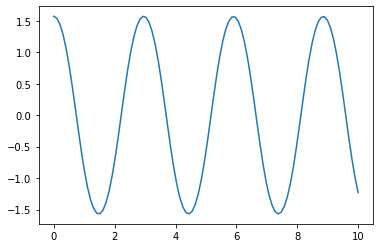

In [15]:
ts = np.linspace(0, 10., 100)
thetas, etas = resultat.sol(ts)
plt.plot(ts, thetas)

# Exercice

Que se passe-t-il quand on a $n$ points équirépartis et pas juste $3$?

Le lagrangien libre est donné par
$$
L = \sum_{i=1}^n m_i \frac{\dot{x}_i^2+\dot{y}_i^2}{2} - g\sum_{i=1}^n m_i y_i
$$

Mais on a les contraintes

$$
\begin{equation}
\begin{cases}
m_i = \frac{M}{n} \\
x_i = \frac{i}{n}l\sin{\theta}\\
y_i = -\frac{i}{n}l\cos{\theta}
\end{cases}
\end{equation}
$$

Le lagrangien contraint est donc donné par

$$
\begin{align*}
L&=\sum_{i=1}^n \frac{M}{n}\dot{\theta}^2 l^2\left(\frac{i}{n}\right)^2+g \sum_{i=1}^n\frac{M}{n}\frac{i}{3}l\cos{\theta} \\
&=\frac{M}{n}\dot{\theta}^2 l^2 \sum_{i=1}^n\left(\frac{i}{n}\right)^2+gl\cos{\theta} \frac{M}{n} \sum_{i=1}^n \frac{i}{n}\\
&=\frac{M\dot{\theta}^2}{l} \frac{l}{n}\sum_{k=1}^n\left(\frac{kl}{n}\right)^2+ \frac{gM}{l} \cos{\theta}\frac{l}{n}\sum_{k=1}^n \frac{kl}{n}\\
&\underset{n \to +\infty}{\to} \frac{M\dot{\theta}^2}{l} \int_0^l x^2dx + \frac{gM}{l} \cos{\theta} \int_0^l xdx\\
&=\frac{Ml^2\dot{\theta}^2}{3}+ \frac{gMl}{2} \cos{\theta}
\end{align*}
$$

On obtient donc l'équation différentielle
$$
\ddot{\theta}+\frac{3g}{2l} \sin{\theta}=0
$$

# Exercice

Faites une animation comparant le pendule homogène et le pendule avec une masse à l'extremité avec 50fps sur 10 seconde.

In [16]:
g = 9.8
l = 1.
T = 10.
y_ini = np.array([np.pi / 2, 0])

def flux_singulier(t, X):
    theta, eta = X
    return np.array([eta, - g / l * np.sin(theta)])
    
def flux_homogene(t,X):
    theta, eta = X
    return np.array([eta, -3. * g / (2. * l) * np.sin(theta)])
    
resultat_singulier = solve_ivp(
    fun=flux_singulier,
    t_span=(0, T),
    y0=y_ini,
    dense_output=True
)

resultat_homogene = solve_ivp(
    fun=flux_homogene,
    t_span=(0, T),
    y0=y_ini,
    dense_output=True
)

In [17]:
ts = np.arange(0, T, 0.02)
angles_singulier, _ =  resultat_singulier.sol(ts)
angles_homogene, _ =  resultat_homogene.sol(ts)

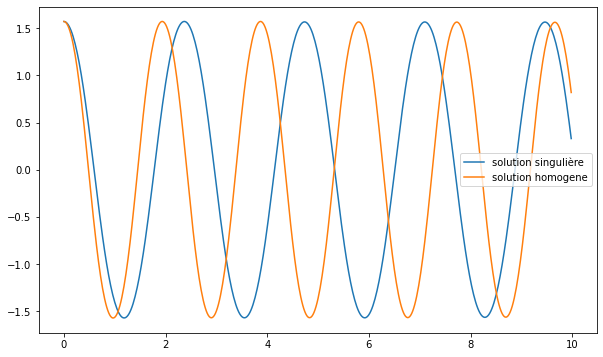

In [19]:
fig, rep = plt.subplots(figsize=(10, 6))
rep.plot(ts, angles_singulier, label="solution singulière")
rep.plot(ts, angles_homogene, label="solution homogene")
rep.legend()


In [20]:
import matplotlib.animation as anim

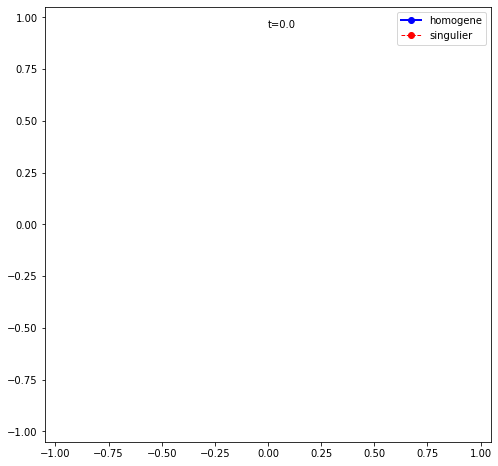

In [43]:
fig, rep = plt.subplots(figsize=(8, 8))
#rep.axis("equal")
rep.set_xlim(-1.05 * l, 1.05 * l)
rep.set_ylim(-1.05 * l, 1.05 * l)
ligne_h, = rep.plot(
    [], 
    [], 
    lw=2, 
    color="blue", 
    marker="o", 
    label="homogene"
)
ligne_s, = rep.plot(
    [], 
    [], 
    lw=1, 
    color="red", 
    marker="o", 
    linestyle="--", 
    label="singulier"
)
texte = rep.text(0, 0.95 * l, f"t={0:.1f}")
rep.legend()


def maj(indice):
    ligne_h.set_data(
        [0, l * np.sin(angles_homogene[indice])], 
        [0, - l * np.cos(angles_homogene[indice])],
    )
    ligne_s.set_data(
        [0, l * np.sin(angles_singulier[indice])], 
        [0, - l * np.cos(angles_singulier[indice])],
    )
    texte.set_text(f"t={indice * 0.02:.1f}")
    return ligne_h, ligne_s, texte
    

ani = anim.FuncAnimation(
    fig=fig,
    func=maj,
    frames=range(len(angles_homogene)),
    interval=20,
)

In [27]:
from IPython.display import HTML

In [44]:
HTML(ani.to_html5_video())

In [45]:
ani.save("pendule.mp4", fps=50, dpi=200)

In [47]:
%%html

<video width="600" height="600" controls="controls">
    <source src="./pendule.mp4" type="video/mp4" />
</video>

# Exercice 

Modéliser et simuler le cas d'un pendule dont la tige est un ressort.

<img width="400" src="./pendule_ressort.svg"/>

On rappelle qu'un ressort de longueur $l$ (au repos $l_0$) et de raideur $k$ a un potentiel $k (l -l_0)^2$. 


Si $P$ est de coordonnées cartésiennes $(x,y)$ on a $l=\sqrt{x^2 + y^2}$.

Le lagrangien en coordonnées cartésiennes vaut
$$
L = m\frac{\dot{x}^2 + \dot{y}^2}{2} - m g y - k \left( \sqrt{x^2 + y^2} - l_0 \right)^2
$$

Les équations d'Euler-Lagrange en coordonnées cartésiennes sont donc
$$
\begin{cases}
\frac{\mathrm{d}}{\mathrm{d}t} \frac{\partial L}{\partial \dot{x}} - \frac{\partial L}{\partial x}=0,\\
\frac{\mathrm{d}}{\mathrm{d}t} \frac{\partial L}{\partial \dot{y}} - \frac{\partial L}{\partial y}=0,
\end{cases}
$$

C'est à dire

$$
\begin{cases}
m\ddot{x} + \left(2 k \left(\sqrt{x^2 + y^2} - l_0\right)\frac{x}{\sqrt{x^2 +  y^2}} \right)=0,\\
m\ddot{y} + mg + \left(2 k \left(\sqrt{x^2 + y^2} - l_0\right)\frac{y}{\sqrt{x^2 +  y^2}} \right)=0,
\end{cases}
$$

On va passer en polaire pour essayer d'avoir une forme plus simple.

$$
\begin{cases}
x = r \sin{\theta},\\
y = - r \cos{\theta}
\end{cases}
$$

Le lagrangien est donné par

$$
L = m\frac{\dot{r}^2 + r^2 \dot{\theta}^2}{2} + m g r \cos{\theta} - k (r - l_0)^ 2.
$$

Formellement les équations d'Euler-Lagrange sont
$$
\begin{cases}
\frac{\mathrm{d}}{\mathrm{d}t} \frac{\partial L}{\partial \dot{r}} - \frac{\partial L}{\partial r}=0,\\
\frac{\mathrm{d}}{\mathrm{d}t} \frac{\partial L}{\partial \dot{\theta}} - \frac{\partial L}{\partial \theta}=0,
\end{cases}
$$

C'est à dire

$$
\begin{cases}
m\ddot{r} - m g \cos{\theta} + 2 k (r - l_0) = 0,\\
m\frac{\mathrm{d}}{\mathrm{d}t} \left(r^2 \dot{\theta}\right) + m g r \sin{\theta} = 0.
\end{cases}
$$